In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [2]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)

# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 1 # path 
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 30
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 20 # RMB
lamda_0_transit = 5
N_hailing = 1000
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

fee_rate =np.arange(1, 10.1, 1)
df = []
for lamda_0_hailing in fee_rate:
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                        origin_zone= origin_zone, destination_zone= destination_zone,
                        miu_in= miu_in, miu_out= miu_out,
                        lamda_0_auto= lamda_0_auto,
                        lamda_0_hailing= lamda_0_hailing,
                        lamda_0_transit= lamda_0_transit,
                        lamda_0_PR= lamda_0_PR,
                        theta_1= theta_1, theta_2= theta_2,
                        N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

total_cost = []
for item in df:
    flow_set = item[2].tail(item[6])
    cost = sum(abs(flow_set['path_cost']) * flow_set['path_flow'])
    total_cost.append(cost)

# OD cost
def od_cost(path, od):
    cost = sum(abs(path[path['OD_pair'] == od]['path_cost']) * path[path['OD_pair'] == od]['path_flow'])
    return cost

od_1_cost = []
od_2_cost = []
od_3_cost = []
od_4_cost = []
for i in range(len(df)):
    flow_set = df[i][2].tail(df[i][6])
    od_1_cost.append(od_cost(flow_set, 'r1-s1'))
    od_2_cost.append(od_cost(flow_set, 'r1-s2'))
    od_3_cost.append(od_cost(flow_set, 'r2-s1'))
    od_4_cost.append(od_cost(flow_set, 'r2-s2'))

# mode share
PR_logit = [df[i][4].tail(df[i][7]).iloc[0]['mode_logit'] for i in range(len(df))]
RT_logit = [df[i][4].tail(df[i][7]).iloc[1]['mode_logit'] for i in range(len(df))]
auto_logit = [df[i][4].tail(df[i][7]).iloc[2]['mode_logit'] for i in range(len(df))]
bus_logit = [df[i][4].tail(df[i][7]).iloc[3]['mode_logit'] for i in range(len(df))]

# ride-hailing vehicle number
n_idle = [df[i][5].tail(1).iloc[0]['n_idle'] for i in range(len(df))]
waiting_hailing = [df[i][5].tail(1).iloc[0]['wait_time'] for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'fare_rate': fee_rate,
        'n_idle': n_idle,
        'waiting time': waiting_hailing,
        'od_1_cost': od_1_cost,
        'od_2_cost': od_2_cost,
        'od_3_cost': od_3_cost,
        'od_4_cost': od_4_cost,
        'total_cost': total_cost,
        'auto_logit': auto_logit,
        'bus_logit': bus_logit,
        'PR_logit': PR_logit,
        'RT_logit': RT_logit,})

  OD_pair  demand
0   r1-s1    5000
1   r1-s2    4000
2   r2-s1    3500
3   r2-s2    3000
0.6517
['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58', 'path-59', 'path-60', 'path-61', 'path-62', 'path-63', 'path-64', 'path-65', 'path-66']
['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'auto', 'auto', 'auto', 'auto

In [3]:
dfx

,fare_rate,n_idle,waiting time,od_1_cost,od_2_cost,od_3_cost,od_4_cost,total_cost,auto_logit,bus_logit,PR_logit,RT_logit
0,1.0,334.553696,6.220579,367809.339421,192602.478935,441937.205149,125788.866655,1.128138e+06,0.279352,0.237250,0.195766,0.287632
1,2.0,379.682323,5.857819,380775.851104,197763.515811,458353.426277,129630.801737,1.166524e+06,0.280868,0.243376,0.199884,0.275872
2,3.0,417.378589,5.599667,392321.693835,202184.350072,473339.056966,132944.551257,1.200790e+06,0.282124,0.248692,0.203459,0.265725
3,4.0,449.358871,5.405871,402526.052036,205926.825989,486942.558405,135980.047872,1.231375e+06,0.283159,0.253242,0.206524,0.257074
4,5.0,476.589878,5.256026,411511.705408,209083.628792,499348.179654,138795.838079,1.258739e+06,0.284010,0.257094,0.209124,0.249772
5,6.0,499.855820,5.137546,419397.848027,211737.624250,510743.913527,141447.401503,1.283327e+06,0.284706,0.260324,0.211310,0.243660
6,7.0,519.806157,5.042174,426294.018402,213960.471356,521309.166947,143985.132877,1.305549e+06,0.285275,0.263011,0.213137,0.238578
7,8.0,536.990232,4.964206,432298.044320,215812.944644,531208.916555,146453.036134,1.325773e+06,0.285738,0.265235,0.214654,0.234374
8,9.0,551.869594,4.899578,437495.752506,217345.896511,540589.182737,148888.362369,1.344319e+06,0.286114,0.267067,0.215910,0.230909
9,10.0,564.830638,4.845320,441961.843564,218601.521652,549575.511967,151321.686093,1.361461e+06,0.286418,0.268572,0.216948,0.228062


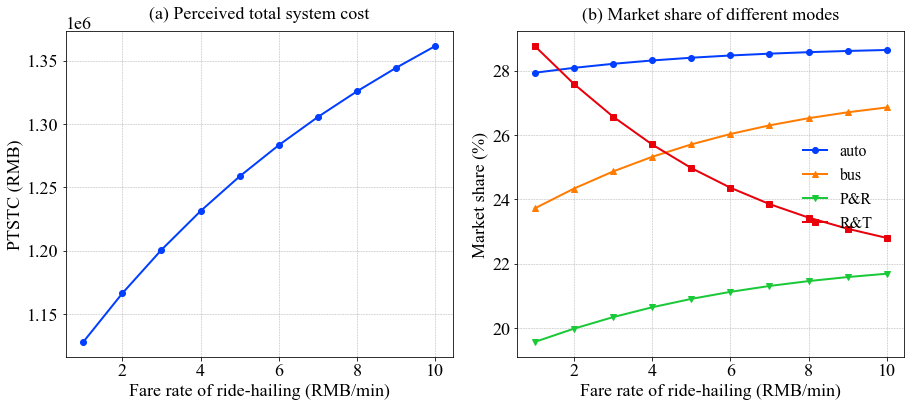

In [4]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(13,6))
markers = ['o','^','v','s','h','D','p','<','>']

ax = plt.subplot(1,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['total_cost'], '-', lw=2, marker='o')
ax.set_xlabel('Fare rate of ride-hailing (RMB/min)')
ax.set_ylabel('PTSTC (RMB)')
ax.set_title('(a) Perceived total system cost', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(1,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['auto_logit']*100, '-', lw=2, marker=markers[0], label='auto')
ax.plot(dfx['fare_rate'], dfx['bus_logit']*100, '-', lw=2, marker=markers[1], label='bus')
ax.plot(dfx['fare_rate'], dfx['PR_logit']*100, '-', lw=2, marker=markers[2], label='P&R')
ax.plot(dfx['fare_rate'], dfx['RT_logit']*100, '-', lw=2, marker=markers[3], label='R&T')
ax.set_xlabel('Fare rate of ride-hailing (RMB/min)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor=(0.7,0.7))
ax.set_title('(b) Market share of different modes', fontsize=18, loc='center', y=1.02,)

plt.tight_layout()
plt.show()

In [5]:
df[0][2]

,OD_pair,demand,path_id,name_sque,attribute_set,path_length,path_duration,path_cost,mode,mode_logit,mode_flow,path_logit,y_flow,I,path_flow
0,r1-s1,5000,path-1,"[r1-N3, N3-N4, N4-N5, N5-N6, N6-N7, N7-N11, N1...","[board_auto, auto, alight_auto]",46.5,0.000000,-0.000000,auto,0.414073,2070.367309,0.027027,55.955873,0,234.848485
1,r1-s1,5000,path-2,"[r1-N3, N3-N4, N4-N5, N5-N6, N6-N10, N10-N11, ...","[board_auto, auto, alight_auto]",52.5,0.000000,-0.000000,auto,0.414073,2070.367309,0.027027,55.955873,0,234.848485
2,r1-s1,5000,path-3,"[r1-N3, N3-N4, N4-N5, N5-N6, N6-N10, N10-N13, ...","[board_auto, auto, alight_auto]",64.5,0.000000,-0.000000,auto,0.414073,2070.367309,0.027027,55.955873,0,234.848485
3,r1-s1,5000,path-4,"[r1-N3, N3-N4, N4-N5, N5-N9, N9-N10, N10-N11, ...","[board_auto, auto, alight_auto]",60.0,0.000000,-0.000000,auto,0.414073,2070.367309,0.027027,55.955873,0,234.848485
4,r1-s1,5000,path-5,"[r1-N3, N3-N4, N4-N5, N5-N9, N9-N10, N10-N13, ...","[board_auto, auto, alight_auto]",72.0,0.000000,-0.000000,auto,0.414073,2070.367309,0.027027,55.955873,0,234.848485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,r2-s2,3000,path-62,"[r2-N1, N1-N4, N4-N8, N8-N12, N12-N13, N13-s2]","[board_auto, auto, alight_auto]",54.0,113.496697,-348.249482,auto,0.279352,838.055307,0.024855,20.829556,300,20.741915
19862,r2-s2,3000,path-63,"[r2-N1, N1-N4, N4-N8, N8-N12, N12-N27, N27-N28...","[board_auto, auto, P&R, transit, alight_transit]",55.0,502.308218,-498.251067,P&R,0.195766,587.299103,0.069745,40.961456,300,40.864320
19863,r2-s2,3000,path-64,"[r2-N21, N21-N22, N22-N27, N27-N28, N28-s2]","[board_transit, transit, transit-transfer, ali...",22.5,462.904460,-206.882811,transit,0.237250,711.750377,0.206056,146.660291,300,146.436465
19864,r2-s2,3000,path-65,"[r2-N14, N14-N17, N17-N19, N19-N25, N25-N27, N...","[board_ride-hailing, ride-hailing, R&T, transi...",58.5,528.305683,-269.395750,R&T,0.287632,862.895213,0.049318,42.556327,300,42.613368


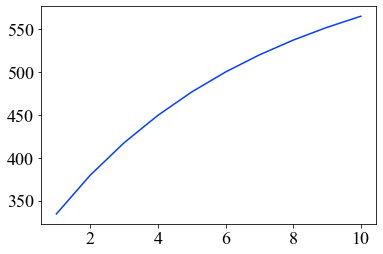

In [6]:
plt.plot(dfx['fare_rate'], dfx['n_idle'])